# E-Commerce & Retail B2B Case Study

## Problem Overview

Schuster is a global retail company specializing in sports goods and accessories. It operates extensively with hundreds of vendors under credit arrangements. However, some vendors fail to adhere to the agreed credit terms and often delay their payments. While Schuster imposes substantial late payment fees, this approach is not sustainable for fostering long-term business relationships. The company also employs staff who spend significant time following up with vendors to ensure timely payments. This practice leads to inefficiencies, wasted time, and financial repercussions. To address these challenges, Schuster aims to analyze customer payment behaviors and predict the likelihood of late payments for outstanding invoices.

To tackle this issue using data science, let’s first review Schuster's current payment process. Each time a transaction occurs with a vendor, the accounting team generates an invoice and shares it with the vendor. The invoice includes details such as the goods supplied, the invoice amount, the creation date, and the payment due date, based on the credit terms outlined in the contract. Given the frequency of transactions, multiple invoices are typically active for each vendor at any time.

## Objectives
Schuster aims to gain deeper insights into its customers' payment behavior by analyzing their past payment patterns through customer segmentation. By leveraging historical data, the company seeks to predict the likelihood of delayed payments for outstanding invoices. This predictive capability would enable Schuster to prioritize its collection efforts, allowing collectors to proactively follow up with customers and ensure timely payments.

In [5]:
# Importing important lbraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Received payment data

##### Step 1: Analysing Data Files

In [8]:
# Reading the data-set

payment_data = pd.read_csv('Received_Payments_Data.csv')
payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [9]:
# Dataset info 

payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [10]:
# Dataset summary

payment_data.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [11]:
# Checking shape of the data

payment_data.shape

(93937, 16)

In [12]:
# Unique values in columns

payment_data.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DOC_NO              73
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

In [13]:
# Checking null values in percentage

round(payment_data.isna().sum()/len(payment_data.index),4)

RECEIPT_METHOD           0.0000
CUSTOMER_NAME            0.0000
CUSTOMER_NUMBER          0.0000
RECEIPT_DOC_NO           0.0003
RECEIPT_DATE             0.0000
CLASS                    0.0000
CURRENCY_CODE            0.0000
Local Amount             0.0000
USD Amount               0.0000
INVOICE_ALLOCATED        0.0000
INVOICE_CREATION_DATE    0.0000
DUE_DATE                 0.0000
PAYMENT_TERM             0.0000
INVOICE_CLASS            0.0000
INVOICE_CURRENCY_CODE    0.0000
INVOICE_TYPE             0.0000
dtype: float64

##### Since the "RECEIPT_DOC_NO" column has only 0.03% null values, dropping the column as it will not impact model building.

In [15]:
payment_data.drop('RECEIPT_DOC_NO', axis=1, inplace=True)

payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


##### 

##### Changing date columns to pandas datatime



In [18]:
payment_data['RECEIPT_DATE'] = pd.to_datetime(payment_data['RECEIPT_DATE'])


In [19]:
payment_data['DUE_DATE'] = pd.to_datetime(payment_data['DUE_DATE'])

In [20]:
payment_data['INVOICE_CREATION_DATE'] = pd.to_datetime(payment_data['INVOICE_CREATION_DATE'])


In [21]:
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CLASS                  93937 non-null  object        
 5   CURRENCY_CODE          93937 non-null  object        
 6   Local Amount           93937 non-null  float64       
 7   USD Amount             93937 non-null  float64       
 8   INVOICE_ALLOCATED      93937 non-null  object        
 9   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 10  DUE_DATE               93937 non-null  datetime64[ns]
 11  PAYMENT_TERM           93937 non-null  object        
 12  INVOICE_CLASS          93937 non-null  object        
 13  I

##### Creating the target column 'default' based on the late bill payment.

In [23]:
# Creating the target column 'default' by converting boolean to integer to 

payment_data['default'] = (payment_data["RECEIPT_DATE"] > payment_data["DUE_DATE"]).astype(int)

In [24]:
# Defaulted payments

payment_data.default.value_counts()

default
1    61978
0    31959
Name: count, dtype: int64

In [25]:
# Defaulted payments percentage

payment_data.default.value_counts(normalize=True)

default
1    0.659783
0    0.340217
Name: proportion, dtype: float64

### Step 2: Exploratory Data Analysis

##### Categorical Columns


In [28]:
ctg_cols= ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS','INVOICE_CURRENCY_CODE', 'INVOICE_TYPE',
           'RECEIPT_METHOD']

##### Numerical Columns

In [30]:
num_cols= ['Local Amount', 'USD Amount']

##### 

#### Univariate Analysis

##### Numerical Columns


In [34]:
# Bills with Local Amount equal to 0

payment_data[payment_data['Local Amount'] == 0].shape

(1126, 16)

#### 1126 bills have amount equal to 0, hence dropping these rows.

##### 

##### Dropping the rows with 'Local Amount' = 0

In [38]:
payment_data = payment_data[payment_data['Local Amount'] > 0]

In [39]:
payment_data.shape

(92811, 16)

In [40]:
# Summary of 'Local Amount'

payment_data['Local Amount'].describe().round()

count       92811.0
mean      1079408.0
std       1551763.0
min             5.0
25%         90577.0
50%        415084.0
75%       1465108.0
max      10849829.0
Name: Local Amount, dtype: float64

##### 

##### 'Local Amount' column Distribution


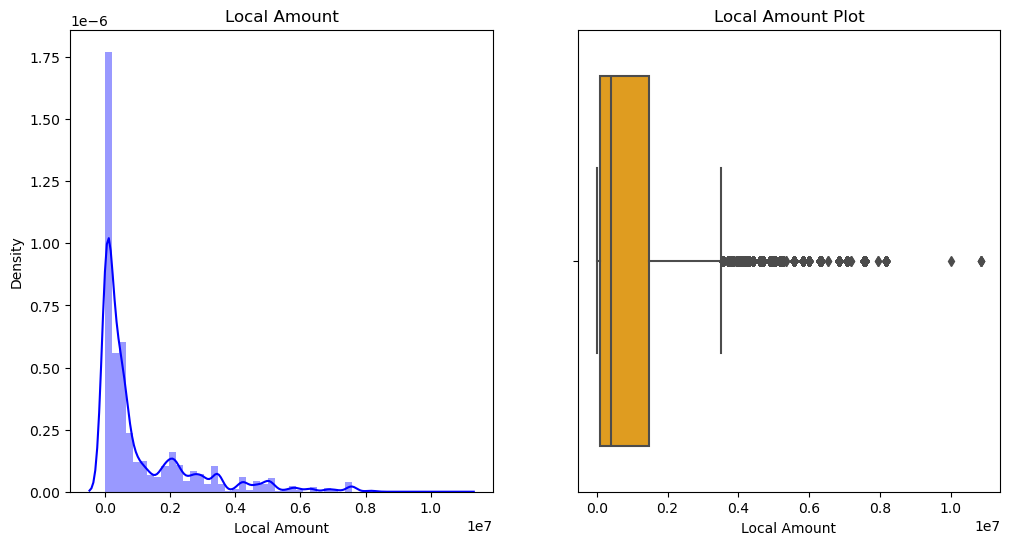

In [43]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(payment_data['Local Amount'], color='Blue')
plt.title("Local Amount")

plt.subplot(1, 2, 2)
sns.boxplot(x=payment_data['Local Amount'], color='orange')
plt.title("Local Amount Plot")

plt.show()

#### Dropping the 'Local Amount' column since it includes multiple currencies, and we already have the 'USD Amount' column for bill amounts.

In [45]:
# Dropping the 'Local Amount' column

payment_data.drop('Local Amount', axis=1, inplace=True)

In [46]:
payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [47]:
# 'USD Amount' column summary

payment_data['USD Amount'].describe().round()

count       92811.0
mean       537646.0
std        954807.0
min             1.0
25%         40453.0
50%        191287.0
75%        599614.0
max      10849829.0
Name: USD Amount, dtype: float64

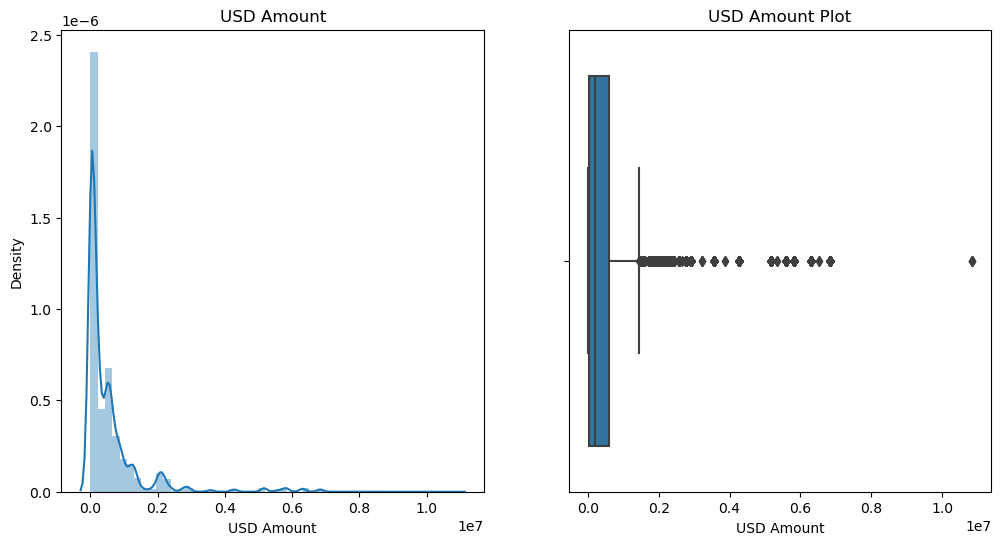

In [48]:
# Distribution of 'USD Amount' column

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(payment_data['USD Amount'])
plt.title("USD Amount")

plt.subplot(1, 2, 2)
sns.boxplot(x=payment_data['USD Amount'])
plt.title("USD Amount Plot")

plt.show()


#### Categorical Columns

##### CUSTOMER_NAME column

In [51]:
# Unique customer names

payment_data['CUSTOMER_NAME'].nunique()

689

In [52]:
# Top 10 customers basis total invoices

payment_data['CUSTOMER_NAME'].value_counts().head(10)

CUSTOMER_NAME
SEPH Corp    23075
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
DEBE Corp     2133
RADW Corp     1647
YOUG Corp     1480
HABC Corp     1402
CARR Corp      952
Name: count, dtype: int64

##### CLASS column

In [54]:
# Checking the number of unique values in the column

payment_data['CLASS'].nunique()

1

In [55]:
# Dropping the CLASS column as it has only one value

payment_data.drop('CLASS', axis=1, inplace=True)

##### CURRENCY_CODE column

In [57]:
# Checking the number of unique values in the column

payment_data['CURRENCY_CODE'].nunique()

8

In [58]:
# Checking the value counts of each currency code

payment_data['CURRENCY_CODE'].value_counts()

CURRENCY_CODE
AED    36027
SAR    35784
USD    19361
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: count, dtype: int64

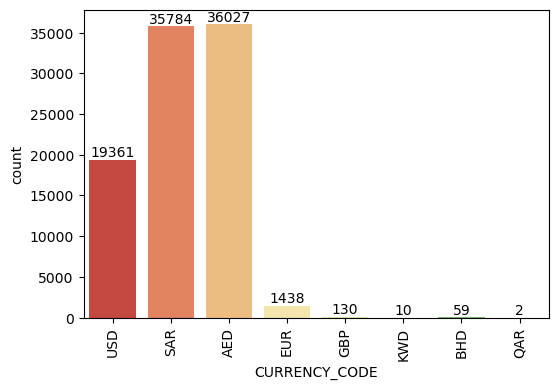

In [59]:
# Visualising 'CURRENCY_CODE' column

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=payment_data, x='CURRENCY_CODE', palette='RdYlGn')
plt.xticks(rotation=90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()



##### The currencies used for bill payments are mainly USD, SAR, and AED.

##### 

##### PAYMENT_TERM column

In [63]:
# Checking number of unique values in 'PAYMENT_TERM' column

payment_data['PAYMENT_TERM'].nunique()

42

In [64]:
# Checking the unique values

payment_data['PAYMENT_TERM'].unique()

array(['30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       'Immediate', '100% Adv Payment', 'Immediate Payment',
       '15 Days from EOM', '25 DAYS FROM EOM', '60 Days from EOM',
       '60 Days from Inv Date', '45 Days from Inv Date',
       '90 Days from Inv Date', '15 Days from Inv Date',
       'Cash on Delivery', '45 DAYS + EOM', '90 Days from EOM',
       'On Consignment', 'EOM', '7 Days from Inv Date',
       '50% ADVANCE PAYMENT AND 50% UPON RECEIVING THE SHIPMENT',
       '75 Days from EOM', 'Standby LC at 30 days',
       '30% advance 70% after 30 days from invoice date', 'LC at 60 days',
       '50% Advance 50% INVDATE+60 DAYS', '120 Days from EOM',
       '75 Days from Inv Date', 'LCSight', '180 DAYS FROM INV DATE',
       'LC at 90 days', '30% advance 70% after 60 days from invoice date',
       'Cash Against Document at sight', 'Advance with discount',
       '50% ADV 50% 30 Days', '120 Days from Inv Date',
       '25% ADVANCE, 75% 30 DAYS FROM INVOIC

In [65]:
# Top 10 PAYMENT_TERM

payment_data['PAYMENT_TERM'].value_counts().head(10)

PAYMENT_TERM
60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
15 Days from EOM          7533
Immediate Payment         5468
Immediate                 4946
90 Days from EOM          3893
45 Days from Inv Date     3550
45 Days from EOM          3509
Name: count, dtype: int64

##### 

##### INVOICE_CLASS column

In [68]:
# Checking value count of each level of INVOICE_CLASS

payment_data['INVOICE_CLASS'].value_counts()

INVOICE_CLASS
INV    87313
CM      4946
DM       552
Name: count, dtype: int64

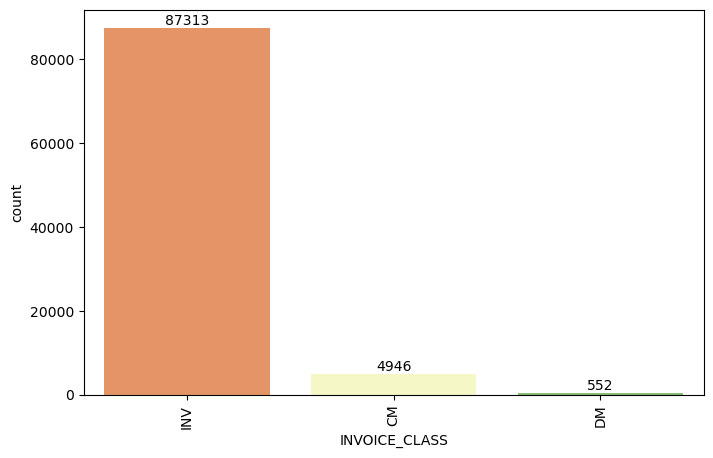

In [69]:
# Visualising 'INVOICE_CLASS' column

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=payment_data, x='INVOICE_CLASS', palette='RdYlGn')
plt.xticks(rotation=90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()



##### The INVOICE_CLASS column has the highest number of bills under the 'INV' category.

##### 

##### INVOICE_CURRENCY_CODE column

In [73]:
# Unique values in the INVOICE_CURRENCY_CODE column

payment_data['INVOICE_CURRENCY_CODE'].nunique()

10

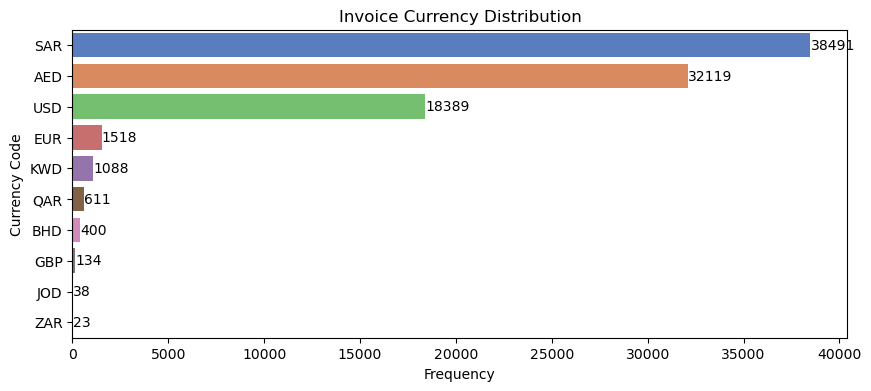

In [74]:
# Visualising the INVOICE_CURRENCY_CODE column

plt.figure(figsize=(10, 4))

ax = sns.countplot(data=payment_data, y='INVOICE_CURRENCY_CODE', order=payment_data['INVOICE_CURRENCY_CODE'].value_counts().index, palette='muted')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Invoice Currency Distribution")
plt.ylabel("Currency Code")
plt.xlabel("Frequency")
plt.show()


##### Most invoices were generated in SAR, AED, and USD currencies.

##### 

##### INVOICE_TYPE column

In [78]:
# Value count of each level of INVOICE_TYPE

payment_data['INVOICE_TYPE'].value_counts()

INVOICE_TYPE
Goods        66569
Non Goods    26242
Name: count, dtype: int64

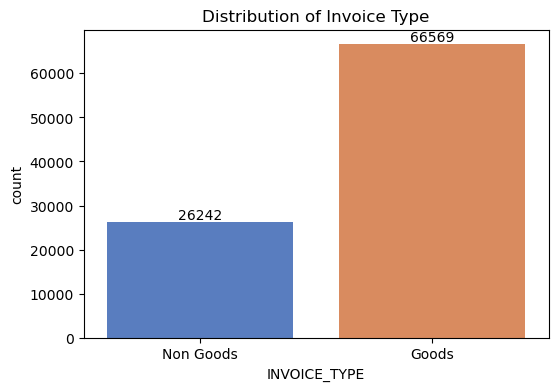

In [79]:
# Visualising the INVOICE_TYPE column

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=payment_data, x='INVOICE_TYPE', palette='muted')

for label in ax.containers:
    ax.bar_label(label)

plt.title("Distribution of Invoice Type")
plt.show()

##### Nearly 70% of the invoices generated were for goods.

##### 

##### RECEIPT_METHOD column

In [83]:
# Value count of each level of RECEIPT_METHOD column

payment_data['RECEIPT_METHOD'].value_counts()

RECEIPT_METHOD
WIRE             83281
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: count, dtype: int64

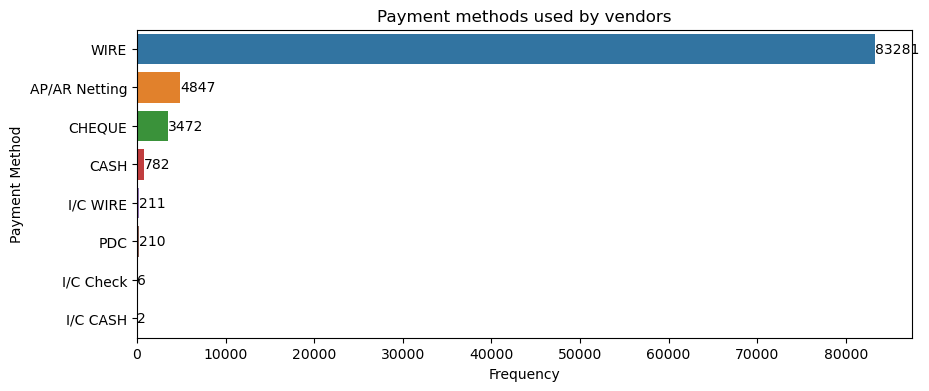

In [84]:
# Visualising the RECEIPT_METHOD column

plt.figure(figsize=(10,4))

ax = sns.countplot(data=payment_data, y='RECEIPT_METHOD', order=payment_data['RECEIPT_METHOD'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)

plt.title("Payment methods used by vendors")
plt.ylabel("Payment Method")
plt.xlabel("Frequency")

plt.show()

##### The most common payment method for bill payments is WIRE.

##### 

### Checking Data Imbalance

In [88]:
payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [89]:
# Checking distribution of target column 'default'

payment_data["default"].value_counts(normalize= True)

default
1    0.656528
0    0.343472
Name: proportion, dtype: float64

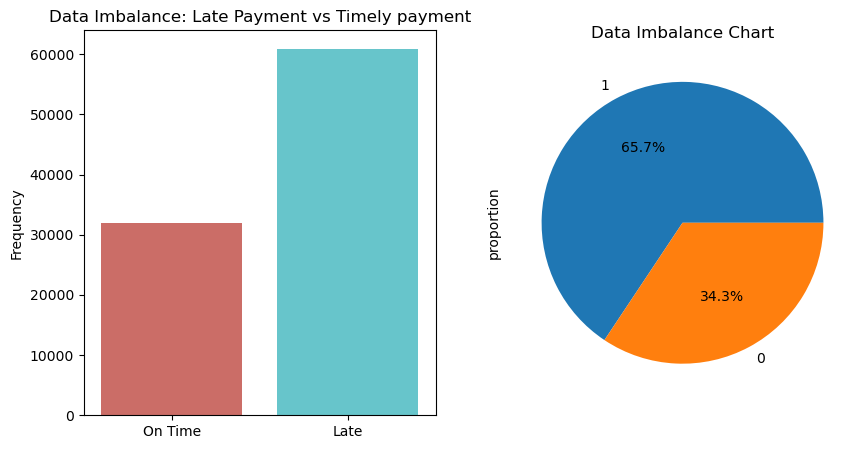

In [90]:
# ploting the column

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='default', data=payment_data, palette='hls')

plt.title("Data Imbalance: Late Payment vs Timely payment")
plt.xlabel("")
plt.ylabel("Frequency")
plt.xticks((0,1), ('On Time', 'Late'))

plt.subplot(1,2,2)

# data imbalance chart
(payment_data.default.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Data Imbalance Chart")

plt.show()

##### The target variable has a well-distributed dataset.

##### 

#### Bi-variate Analysis

In [94]:
payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [95]:
# Extracting months from the date columns

payment_data['month_reciept'] = payment_data['RECEIPT_DATE'].dt.month
payment_data['month_inv_creation'] = payment_data['INVOICE_CREATION_DATE'].dt.month
payment_data['month_due'] = payment_data['DUE_DATE'].dt.month

In [96]:
payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default,month_reciept,month_inv_creation,month_due
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,4,11,12
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,1,12,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,1,1,3
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,1,12,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,1,12,1


In [97]:
# Invoices due as per months

orders_due_month = payment_data.groupby('month_due').count()['DUE_DATE']
orders_due_month

month_due
1     13295
2     12893
3     14605
4     14051
5     13321
6     10479
7      1523
8      1075
9       914
10     1579
11     2875
12     6201
Name: DUE_DATE, dtype: int64

In [98]:
# Effect of monthly due on late payment rate

# Creating a pivot table to see the effects of different months on percentage of late payments
overdue_payments = payment_data.groupby('month_due').mean(numeric_only=True)['default']
overdue_payments.sort_index(ascending= True)

month_due
1     0.716134
2     0.688048
3     0.620199
4     0.620454
5     0.559643
6     0.416070
7     0.363099
8     0.793488
9     0.974836
10    0.999367
11    1.000000
12    0.999839
Name: default, dtype: float64

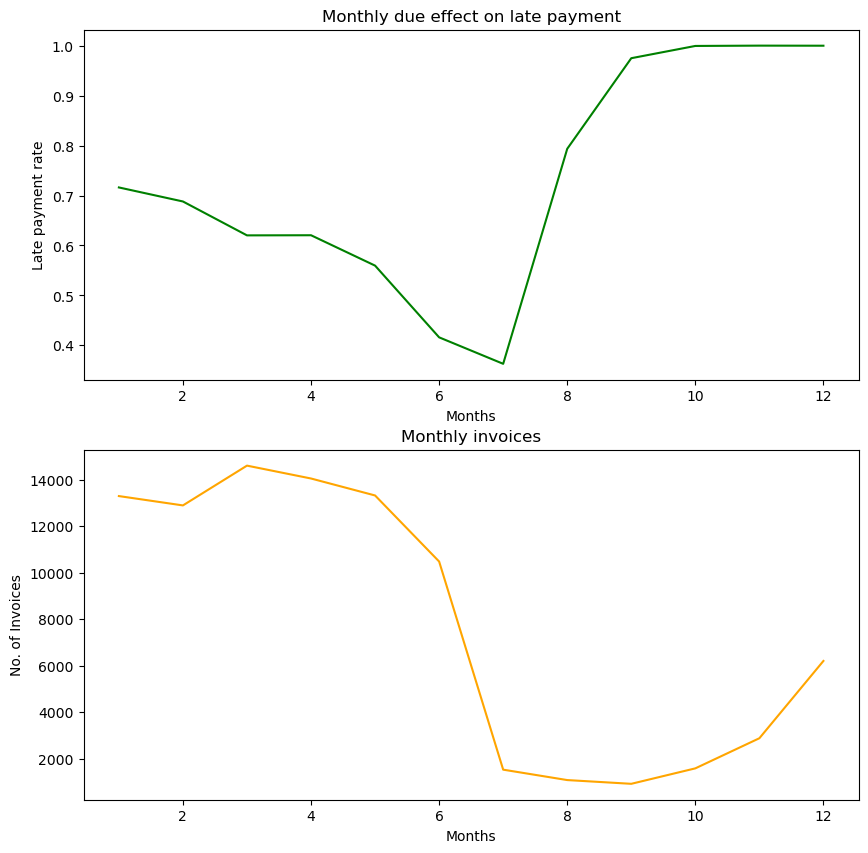

In [99]:
# Visualising the effect of month on late payment rate

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(overdue_payments, color='green')
plt.title("Monthly due effect on late payment")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2, 1, 2)
plt.plot(orders_due_month, color='orange')
plt.title("Monthly invoices")
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()


##### In the 3rd month, the number of invoices is the highest, and the late payment rate is relatively lower compared to other months with a high volume of invoices.

##### The 7th month has a very low late payment rate, likely due to the low number of invoices during this month.

##### In the second half of the year, late payments increase significantly from the 7th month onward, even though the number of invoices is lower compared to the first half of the year.

##### 

##### Receipt_data

In [105]:
# number of payments received in a month

order_month_receipt = payment_data.groupby('month_reciept').count()['DUE_DATE']

In [106]:
# out of all the payments received in month how many were late payments
monthly_receipt = payment_data.groupby('month_due').mean(numeric_only=True)['default']
print(monthly_receipt)

month_due
1     0.716134
2     0.688048
3     0.620199
4     0.620454
5     0.559643
6     0.416070
7     0.363099
8     0.793488
9     0.974836
10    0.999367
11    1.000000
12    0.999839
Name: default, dtype: float64


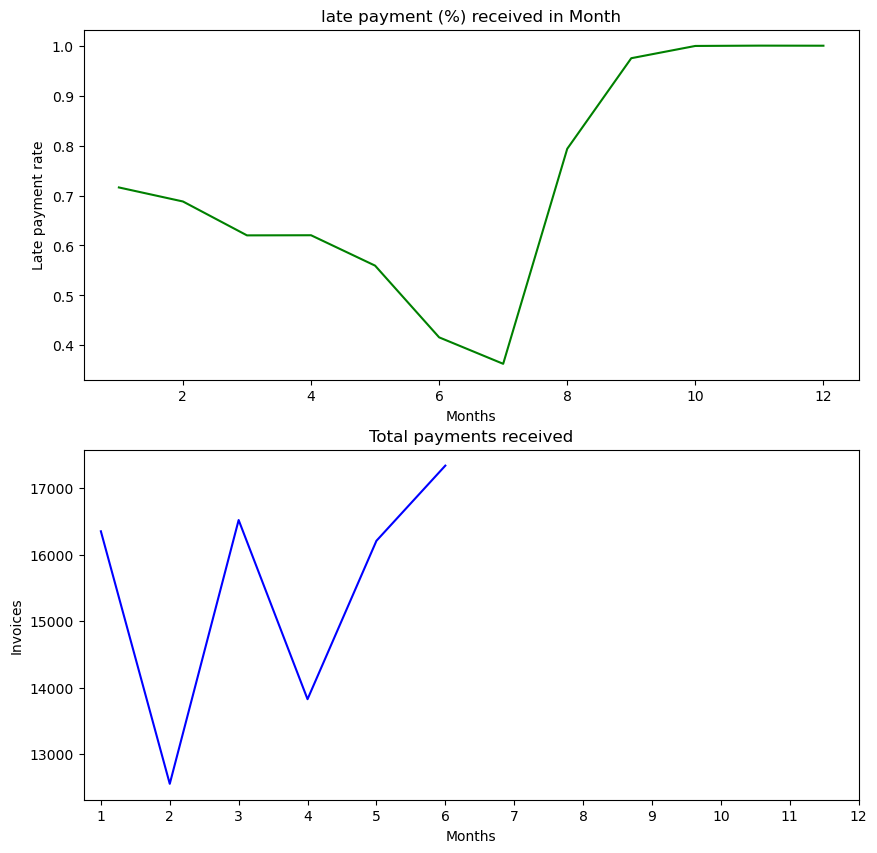

In [107]:
# Visualizing the effect of invoice due month, on the late payment rate

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(monthly_receipt, color='green')
plt.title("late payment (%) received in Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2, 1, 2)
plt.plot(order_month_receipt, color='blue')
plt.title("Total payments received")
plt.xticks([i for i in range(1, 13, 1)])
plt.xlabel("Months")
plt.ylabel("Invoices")

plt.show()


##### No payments were received for any invoices from the 7th month onward.

##### 

##### Invoice creation data

In [111]:
# Invoices generated per month

orders_month_created = payment_data.groupby('month_inv_creation').count()['DUE_DATE']  

# Percentage of late payment from all the invoices created

month_created = payment_data.groupby('month_inv_creation').mean(numeric_only=True)['default'] 
month_created

month_inv_creation
1     0.652520
2     0.633990
3     0.589458
4     0.525976
5     0.496764
6     0.602334
7     0.988984
8     1.000000
9     1.000000
10    0.925293
11    0.821177
12    0.676715
Name: default, dtype: float64

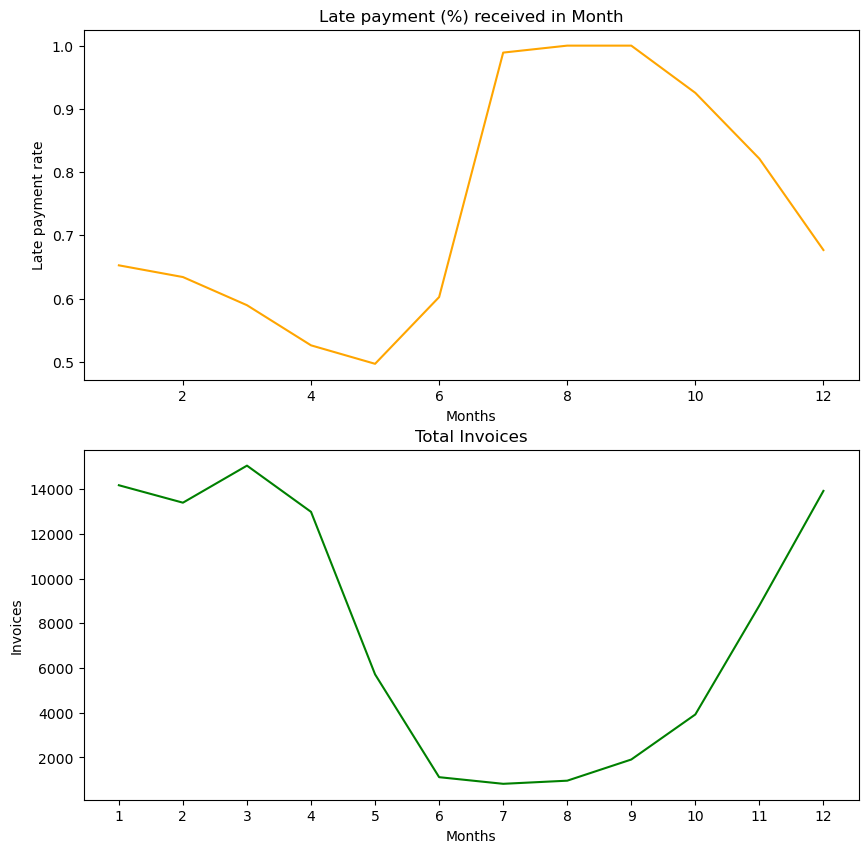

In [112]:
# Visualizing the effect of months in which the invoice is due, on the late payment rate

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(month_created, color='orange')
plt.title("Late payment (%) received in Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2, 1, 2)
plt.plot(orders_month_created, color='green')
plt.title("Total Invoices")
plt.xticks([i for i in range(1, 13, 1)])
plt.xlabel("Months")
plt.ylabel("Invoices")

plt.show()



##### - The late payment rate decreases steadily from the 1st to the 5th month.  
##### - The late payment rate is extremely high during the 7th, 8th, and 9th months.

##### 

##### USD Amount column

In [116]:
usd_amt_late = payment_data.pivot_table(values='USD Amount', index='default', aggfunc=['mean', 'median', np.std]).reset_index()
usd_amt_late

,default,mean,median,std
,,USD Amount,USD Amount,USD Amount
0,0,575247.544230,224785.0410,879205.782363
1,1,517974.153529,165499.3105,991505.462081


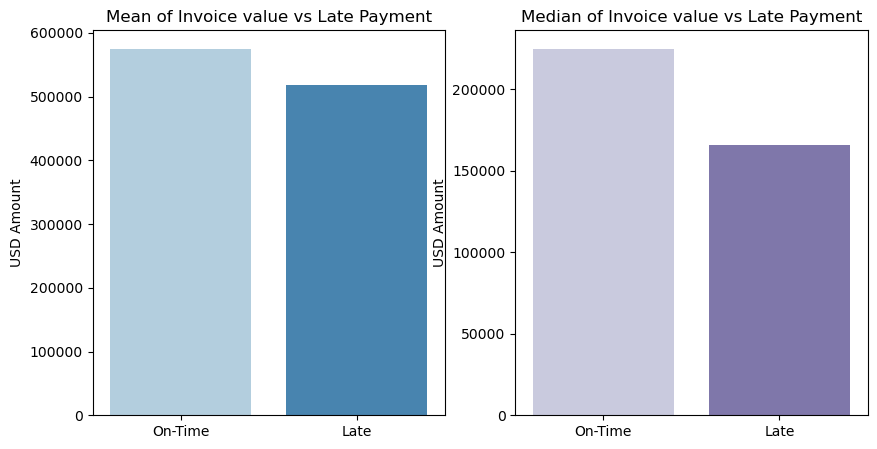

In [117]:
# Differencing between mean and median of the invoice value wrt late payment

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=usd_amt_late, x='default', y=('mean', 'USD Amount'), palette='Blues')
plt.xticks((0, 1), ('On-Time', 'Late'))
plt.title("Mean of Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.subplot(1, 2, 2)
sns.barplot(data=usd_amt_late, x='default', y=('median', 'USD Amount'), palette='Purples')
plt.xticks((0, 1), ('On-Time', 'Late'))
plt.title("Median of Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.show()


- The mean and median of invoice value of On-time bill payment is higher than late payment.

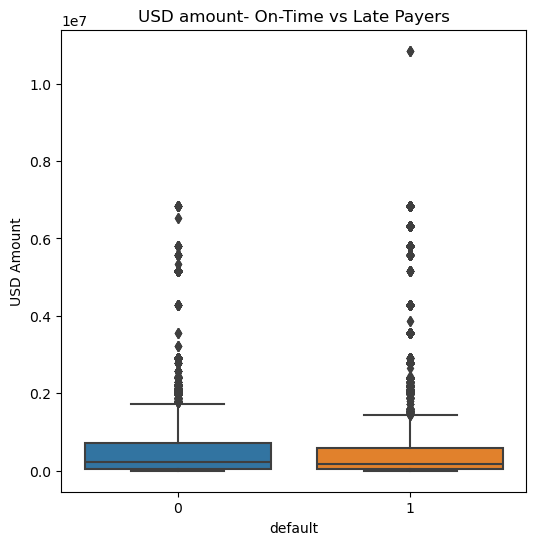

In [119]:
plt.figure(figsize=(6,6))

sns.boxplot(y = 'USD Amount', x='default', data = payment_data)
plt.title("USD amount- On-Time vs Late Payers")

plt.show()

##### CUSTOMER_NAME column

In [121]:
customer_total_orders = payment_data.groupby('CUSTOMER_NAME').count()['default'].sort_values(ascending=False).reset_index()
customer_total_orders_late = payment_data.groupby('CUSTOMER_NAME').mean(numeric_only=True)['default'].sort_values(ascending=False).reset_index()
customer_total_orders_late.head()

,CUSTOMER_NAME,default
0,ZV F Corp,1.0
1,IT C Corp,1.0
2,JOEY Corp,1.0
3,JIBB Corp,1.0
4,JC G Corp,1.0


In [122]:
# Finding the important customers (customers with more than 500 orders)

imp_cust = customer_total_orders[customer_total_orders['default'] > 500]['CUSTOMER_NAME']
imp_cust

0     SEPH Corp
1     FARO Corp
2     PARF Corp
3     ALLI Corp
4     AREE Corp
5     DEBE Corp
6     RADW Corp
7     YOUG Corp
8     HABC Corp
9     CARR Corp
10    AL T Corp
11    VAVA Corp
12    CGR  Corp
13    REAL Corp
14    PARI Corp
15    ARAB Corp
16    LIFE Corp
17    AL S Corp
18    MCT  Corp
19    CWF  Corp
20    AL F Corp
21    CHRI Corp
Name: CUSTOMER_NAME, dtype: object

In [123]:
# Checking only important customers late payment rate

imp_cust_late = customer_total_orders_late[customer_total_orders_late['CUSTOMER_NAME'].isin(imp_cust)]
imp_cust_late

,CUSTOMER_NAME,default
201,YOUG Corp,1.000000
246,VAVA Corp,0.937873
256,AL T Corp,0.917241
273,LIFE Corp,0.899522
287,PARI Corp,0.876153
306,PARF Corp,0.847222
308,AL S Corp,0.842788
341,CHRI Corp,0.787276
342,CARR Corp,0.786765
380,HABC Corp,0.726106


##### 

##### INVOICE_CLASS column

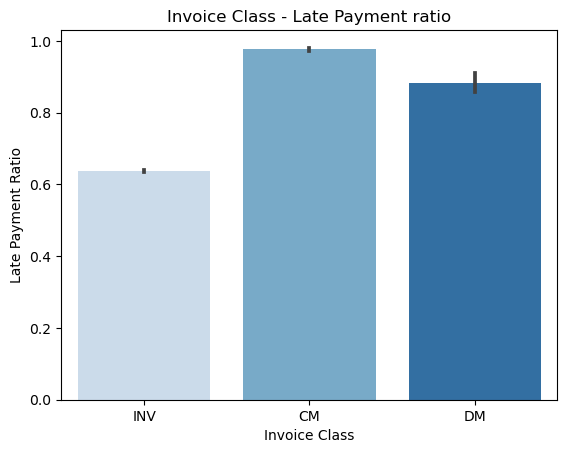

In [126]:
# Visualising the late payment ratio of each invoice class

sns.barplot(data=payment_data, x='INVOICE_CLASS', y='default', estimator=np.mean, palette='Blues')
plt.title("Invoice Class - Late Payment ratio")
plt.xlabel("Invoice Class")
plt.ylabel("Late Payment Ratio")
plt.show()

##### - The late payment ratio is highest for the CM INVOICE_CLASS and lowest for the INV INVOICE_CLASS.

##### 

##### INVOICE_TYPE class

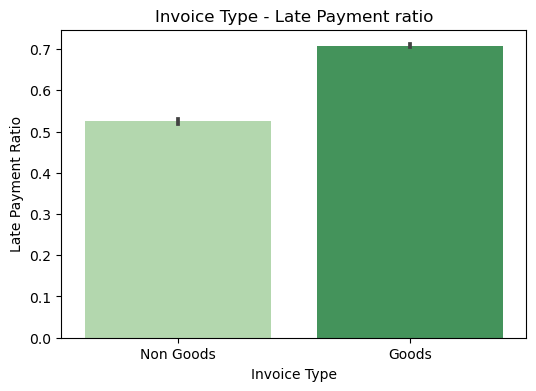

In [130]:
# Visualising the late payment ratio of each Invoice Type

plt.figure(figsize=(6,4))

sns.barplot(data=payment_data, x='INVOICE_TYPE', y='default', estimator=np.mean, palette='Greens')
plt.title("Invoice Type - Late Payment ratio")
plt.xlabel("Invoice Type")
plt.ylabel("Late Payment Ratio")
plt.show()

- The late payment ratio is higher for Goods compared to Non-Goods.

### Step 3: Feature Engineering

##### PAYMENT_TERM column

In [134]:
# Using cumsum() function for cummulative sum on value_counts()

pay_term_cumsum = payment_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
15 Days from EOM                                           0.701533
Immediate Payment                                          0.760449
Immediate                                                  0.813740
90 Days from EOM                                           0.855685
45 Days from Inv Date                                      0.893935
45 Days from EOM                                           0.931743
90 Days from Inv Date                                      0.955566
100% Adv Payment                                           0.968905
25 DAYS FROM EOM                                           0.973882
Cash on Delivery                                           0.978386
15 Days from Inv Date              

In [135]:
# Both Immediate and Immediate payment are same, hence replacing with Immediate Payment

payment_data['PAYMENT_TERM'] = payment_data['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')

# 45 Days from EOM and 45 DAYS + EOM are giving same information, hence using 45 Days from EOM

payment_data['PAYMENT_TERM'] = payment_data['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')

pay_term_cumsum = payment_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
Immediate Payment                                          0.732575
15 Days from EOM                                           0.813740
90 Days from EOM                                           0.855685
45 Days from EOM                                           0.896963
45 Days from Inv Date                                      0.935212
90 Days from Inv Date                                      0.959035
100% Adv Payment                                           0.972374
25 DAYS FROM EOM                                           0.977352
Cash on Delivery                                           0.981856
15 Days from Inv Date                                      0.985691
On Consignment                     

- As it can be seen, around 95% of data is covered by 10 values, hence we will club the rest of the values to others in both datasets.

In [137]:
payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default,month_reciept,month_inv_creation,month_due
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,4,11,12
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,1,12,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,1,1,3
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,1,12,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,1,12,1


In [138]:
# Top 10 values to keep
vals_to_keep= pay_term_cumsum.index[:10]

In [139]:
# Clubbing the rest values to others
payment_data['PAYMENT_TERM'] = payment_data['PAYMENT_TERM'].apply(lambda x : x if x in vals_to_keep else 'others')

In [140]:
# Sanity Check
payment_data['PAYMENT_TERM'].value_counts()

PAYMENT_TERM
60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
Immediate Payment        10414
15 Days from EOM          7533
90 Days from EOM          3893
45 Days from EOM          3831
others                    3802
45 Days from Inv Date     3550
90 Days from Inv Date     2211
Name: count, dtype: int64

#### Dummy Variable

In [142]:
# Creating dummy variables for the 'PAYMENT_TERM' column

term_dummies= pd.get_dummies(payment_data['PAYMENT_TERM']).drop('others', axis=1).astype(int)

payment_data = payment_data.join(term_dummies).drop('PAYMENT_TERM', axis=1 )

# Sanity Check
payment_data.shape 

(92811, 26)

In [143]:
payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CLASS,...,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,INV,...,0,1,0,0,0,0,0,0,0,0
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,INV,...,0,0,1,0,0,0,0,0,0,0
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,INV,...,0,0,1,0,0,0,0,0,0,0
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,INV,...,0,0,1,0,0,0,0,0,0,0
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,INV,...,0,0,1,0,0,0,0,0,0,0


In [144]:
# Creating dummy variables for the 'INVOICE_CLASS' column

class_dummies= pd.get_dummies(payment_data['INVOICE_CLASS']).astype(int)
class_dummies
payment_data = payment_data.join(class_dummies).drop('INVOICE_CLASS', axis=1 )

In [145]:
payment_data.shape

(92811, 28)

In [146]:
# Checking columns of the dataset
payment_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

In [147]:
payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,AED,...,0,0,0,0,0,0,0,0,0,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,SAR,...,0,0,0,0,0,0,0,0,0,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,SAR,...,0,0,0,0,0,0,0,0,0,1
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,SAR,...,0,0,0,0,0,0,0,0,0,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,SAR,...,0,0,0,0,0,0,0,0,0,1


## Open Invoice Data

### Analysing the data

In [150]:
# Reading the open invoice dataset

invoice_data = pd.read_csv("Open_Invoice_data.csv", encoding='latin1')
invoice_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [151]:
# Shape of the dataset
invoice_data.shape

(88204, 14)

In [152]:
# Removing unecessary columns (not present in receiced payment dataset)
# Dropping 'Transaction Number','Customer Account No' due to no significance for target var.
# Dropping 'Local amount'

invoice_data.drop(['AS_OF_DATE','Customer Type','Transaction Date','Transaction Currency','Transaction Number',
              'Customer Account No','Local Amount'], axis= 1, inplace= True)

In [153]:
# Checking shape of the dataset
invoice_data.shape

(88204, 7)

In [154]:
invoice_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


In [155]:
invoice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      88204 non-null  object
 1   Payment Term       88204 non-null  object
 2   Due Date           88204 non-null  object
 3   Transaction Class  88204 non-null  object
 4   AGE                88204 non-null  int64 
 5   USD Amount         88204 non-null  object
 6   INV_CREATION_DATE  88204 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


In [156]:
round(invoice_data.isna().sum()/len(invoice_data.index), 4)

Customer_Name        0.0
Payment Term         0.0
Due Date             0.0
Transaction Class    0.0
AGE                  0.0
USD Amount           0.0
INV_CREATION_DATE    0.0
dtype: float64

##### - No null values present in the dataset.

In [158]:
# 'Due Date' and 'INV_CREATION_DATE' to pandas datetime

invoice_data['Due Date'] = pd.to_datetime(invoice_data['Due Date'])
invoice_data['INV_CREATION_DATE'] = pd.to_datetime(invoice_data['INV_CREATION_DATE'])

In [159]:
# Different values present in USD Amount column

invoice_data['USD Amount'].unique()

array(['-3,088', '2,000', '2,415', ..., '-914', '12,866', '18,118'],
      dtype=object)

In [160]:
invoice_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,2021-12-21,CREDIT NOTE,105,"-3,088",2021-12-21 12:53:00
1,AL J Corp,30 Days from Inv Date,2022-03-03,INVOICE,33,"2,000",2022-02-01 14:09:00
2,AL J Corp,30 Days from Inv Date,2022-04-23,INVOICE,-18,"2,000",2022-03-24 17:46:00
3,AL R Corp,15 Days from Inv Date,2022-01-19,INVOICE,76,"2,415",2022-01-05 11:49:00
4,ALLI Corp,30 Days from EOM,2022-04-30,INVOICE,-25,"3,800",2022-03-03 22:30:00


In [161]:
# Datatype of USD Amount

invoice_data['USD Amount'] = invoice_data['USD Amount'].apply(lambda x: x.replace(",", ""))
invoice_data['USD Amount'] = invoice_data['USD Amount'].astype(int)

In [162]:
invoice_data['USD Amount']

0        -3088
1         2000
2         2000
3         2415
4         3800
         ...  
88199    -1199
88200     -914
88201    12866
88202    18118
88203    18499
Name: USD Amount, Length: 88204, dtype: int32

- There are negative values present in the column, hence it is safe to remove negative and 0 values

In [164]:
# Dropping values = 0 for USD Amount column

invoice_data = invoice_data[invoice_data['USD Amount']>0]

In [165]:
invoice_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79516 entries, 1 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      79516 non-null  object        
 1   Payment Term       79516 non-null  object        
 2   Due Date           79516 non-null  datetime64[ns]
 3   Transaction Class  79516 non-null  object        
 4   AGE                79516 non-null  int64         
 5   USD Amount         79516 non-null  int32         
 6   INV_CREATION_DATE  79516 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 4.5+ MB


##### - All columns are now in the correct format.

##### 

#### Feature Engineering

##### Payment Term column

In [170]:
# Keeping same levels as in recieved payment dataset
invoice_data['Payment Term'] = invoice_data['Payment Term'].apply(lambda x: x if x in vals_to_keep else 'others')

invoice_data['Payment Term'].value_counts()

Payment Term
30 Days from Inv Date    18328
60 Days from Inv Date    17599
Immediate Payment        16202
60 Days from EOM          8170
others                    5385
30 Days from EOM          5324
90 Days from EOM          2595
90 Days from Inv Date     2429
45 Days from Inv Date     1533
15 Days from EOM          1097
45 Days from EOM           854
Name: count, dtype: int64

In [171]:
# Creating dummy variables for the column
term_dummies_open = pd.get_dummies(invoice_data['Payment Term']).drop('others', axis=1).astype(int)

In [172]:
term_dummies_open.head()

,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0


In [173]:
# Merging the dummies dataframe & invoice_data
# Removing the 'Payment Term' column

invoice_data = invoice_data.join(term_dummies_open).drop('Payment Term', axis=1)
invoice_data.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0
5,ALLI Corp,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0


##### Transaction Class column

In [175]:
# Levels in the column
invoice_data['Transaction Class'].value_counts()

Transaction Class
INVOICE       78251
DEBIT NOTE     1265
Name: count, dtype: int64

In [176]:
# Replacing INVOICE with INV and DEBIT NOTE WITH DM

invoice_data['Transaction Class'] = invoice_data['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')

In [177]:
invoice_data.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INV,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0
2,AL J Corp,2022-04-23,INV,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0
3,AL R Corp,2022-01-19,INV,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0
4,ALLI Corp,2022-04-30,INV,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0
5,ALLI Corp,2022-04-30,INV,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0


In [178]:
# Creating dummy variables for the column

tc = pd.get_dummies(invoice_data['Transaction Class']).astype(int)

In [179]:
# Adding the dummy variables to main dataset
# Dropping the Transaction Class column

invoice_data = invoice_data.join(tc).drop('Transaction Class', axis=1)

In [180]:
# Adding 'CM' level to the invoice_data dataset same as received payment data

invoice_data['CM'] = 0

In [181]:
invoice_data.head(10)

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,0
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0
8,ALLI Corp,2022-04-30,-25,75074,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0
9,ALLI Corp,2022-04-30,-25,21946,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0
10,ALLI Corp,2022-04-30,-25,23141,2022-03-18 17:39:00,0,1,0,0,0,0,0,0,0,0,0,1,0


##### Verifying columns in the received payment dataset and the open invoice dataset

In [183]:
payment_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

In [184]:
invoice_data.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV', 'CM'],
      dtype='object')

### Customer Segmentation

### Recommendation:

Customer-level attributes could serve as significant independent variables for the model. These attributes can be created by performing customer segmentation based on two derived variables:  

1. **Average Payment Time** (in days) for each customer.  
2. **Standard Deviation of Payment Time** for each customer.  

Using clustering techniques (e.g., K-Means or Hierarchical Clustering), you can group customers into distinct clusters based on these variables. These clusters can then be incorporated as an additional categorical input variable for the machine learning model, potentially improving its predictive performance.

In [187]:
# Adding a new column to show actual number of days taken to make the payment post invoice generation

payment_data['act_days_for_pay'] = (payment_data['RECEIPT_DATE']-payment_data['INVOICE_CREATION_DATE']).dt.days

In [188]:
# Customer wise average days taken for payment
customer_segments1= payment_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].mean()
customer_segments1 = customer_segments1.to_frame()
customer_segments1.reset_index
customer_segments1.rename(columns={'act_days_for_pay': 'Avg days for payment'}, inplace=True)
customer_segments1.head()

,Avg days for payment
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250


In [189]:
# Standard deviation for customer wise payment days
customer_segments2 = payment_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].std()
customer_segments2 = customer_segments2.to_frame()
customer_segments2.reset_index
customer_segments2.rename(columns={'act_days_for_pay': 'Std deviation for payment'}, inplace=True)
customer_segments2.head()

,Std deviation for payment
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326


In [190]:
# Merging the above two dataframes
customer_segments = pd.merge(customer_segments1, customer_segments2, how='inner', on='CUSTOMER_NAME')

In [191]:
customer_segments.head()

,Avg days for payment,Std deviation for payment
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


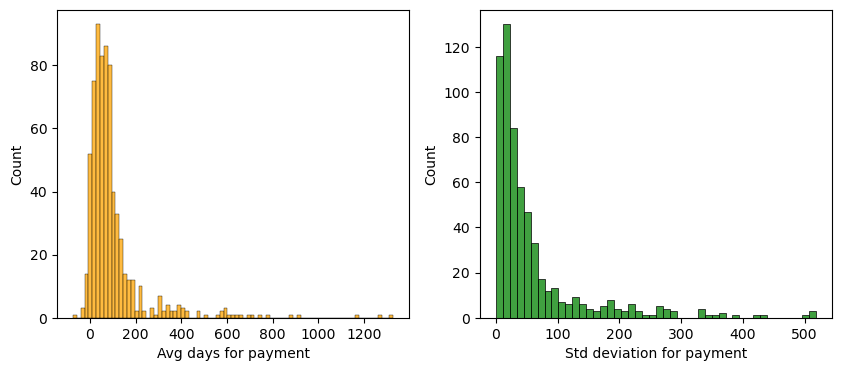

In [192]:
# Visualising the customer_segments dataframe
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(customer_segments['Avg days for payment'], color='orange')

plt.subplot(1, 2, 2)
sns.histplot(customer_segments['Std deviation for payment'], color='green')

plt.show()


- From the above plots we can see that the data is not normalized, hence need to do scaling.

In [194]:
#importing required library

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
customer_segments[['Avg days for payment', 'Std deviation for payment']] = scaler.fit_transform(customer_segments[['Avg days for payment', 'Std deviation for payment']])

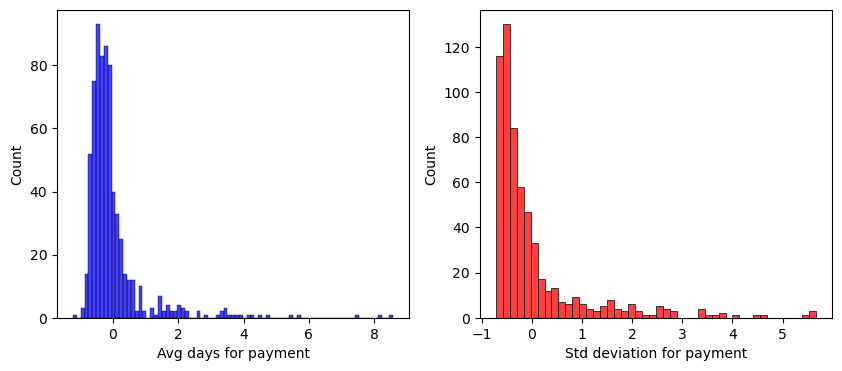

In [213]:
# Visualising the data again
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(customer_segments['Avg days for payment'], color='blue')

plt.subplot(1, 2, 2)
sns.histplot(customer_segments['Std deviation for payment'], color='red')

plt.show()


In [214]:
# resetting the index
customer_segments.reset_index(inplace=True)

In [215]:
# Checking the null values if present
round(customer_segments.isna().sum()/len(customer_segments.index), 4)

CUSTOMER_NAME                0.0000
Avg days for payment         0.0000
Std deviation for payment    0.1248
dtype: float64

In [216]:
# Replacing the null values for Std deviation for payment with 0
customer_segments['Std deviation for payment'].fillna(0,inplace=True)

In [217]:
# copying the customer_segments data for clustering into new dataframe
cluster_df = customer_segments.copy()
cluster_df.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment
0,3D D Corp,-0.534519,-0.563303
1,6TH Corp,-0.420640,-0.626042
2,A3 D Corp,-0.387513,-0.075683
3,ABC Corp,-0.593276,-0.724119
4,ABDU Corp,-0.167009,-0.046851


In [218]:
#dropping customer_name for clustering
cluster_df.drop('CUSTOMER_NAME',axis=1,inplace=True)
cluster_df.head()

,Avg days for payment,Std deviation for payment
0,-0.534519,-0.563303
1,-0.420640,-0.626042
2,-0.387513,-0.075683
3,-0.593276,-0.724119
4,-0.167009,-0.046851


## Clustering

In [220]:
# Importing required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [221]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(cluster_df)
kmeans.cluster_centers_

array([[-0.28929257, -0.32371257],
       [ 1.84767202,  3.39458791],
       [ 0.42790664,  1.05103074],
       [ 4.66736808,  0.44512922]])

#### Finding optimal number of clusters

In [223]:
# silhouette analysis
cluster_range = [2, 3, 4, 5, 6, 7, 8]

for cluster in cluster_range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=cluster, max_iter=50, random_state=42)
    kmeans.fit(cluster_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7557759850933141
For n_clusters=3, the silhouette score is 0.73503646233166
For n_clusters=4, the silhouette score is 0.6182691953064194
For n_clusters=5, the silhouette score is 0.6209288452882942
For n_clusters=6, the silhouette score is 0.40252553894618837
For n_clusters=7, the silhouette score is 0.4069490441271981
For n_clusters=8, the silhouette score is 0.4151884768372497


- From the above results, we can see that for 3 clusters, the silhouette score is decent. Hence selecting n_clusters as 3.

In [225]:
# final model with n_clusters=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(cluster_df)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [226]:
# Checking kmean labels
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [227]:
# Assigning labels to the customer_segments
customer_segments['cluster_id'] = kmeans.labels_
customer_segments.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment,cluster_id
0,3D D Corp,-0.534519,-0.563303,2
1,6TH Corp,-0.420640,-0.626042,2
2,A3 D Corp,-0.387513,-0.075683,2
3,ABC Corp,-0.593276,-0.724119,2
4,ABDU Corp,-0.167009,-0.046851,2


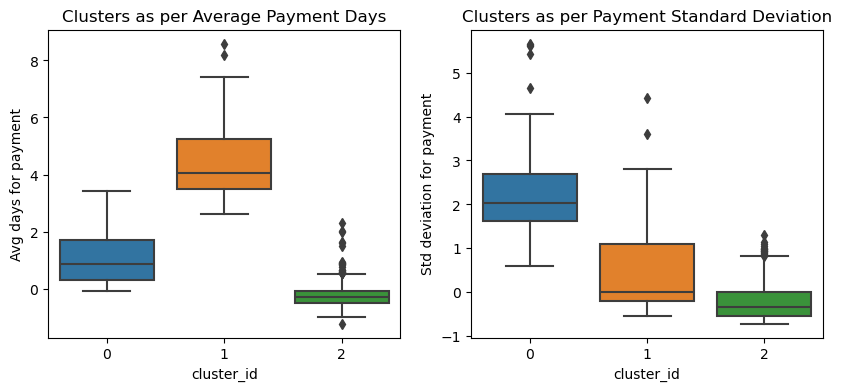

In [228]:
# Plotting box plot based on clusters
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg days for payment', data=customer_segments)
plt.title("Clusters as per Average Payment Days")


plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std deviation for payment', data=customer_segments)
plt.title("Clusters as per Payment Standard Deviation")
plt.show()

- '1' Cluster -- Prolonged Invoice Payment

- '2' Cluster -- Early Invoice Payment

- '0' Cluster -- Medium Invoice Payment

In [230]:
# Dropping the 'Avg days for payment' and 'Std deviation for payment' columns for merging this dataset with open invoice 
# dataset to assign cluster id to each customers
customer_segments.drop(['Avg days for payment', 'Std deviation for payment'], axis=1, inplace=True)

In [231]:
customer_segments.head()

,CUSTOMER_NAME,cluster_id
0,3D D Corp,2
1,6TH Corp,2
2,A3 D Corp,2
3,ABC Corp,2
4,ABDU Corp,2


In [232]:
# Creating a copy
customer_info = customer_segments.copy()

In [233]:
# Renaming the column
customer_info.rename(columns={'CUSTOMER_NAME':'Customer_Name'}, inplace=True)
customer_info.head()

,Customer_Name,cluster_id
0,3D D Corp,2
1,6TH Corp,2
2,A3 D Corp,2
3,ABC Corp,2
4,ABDU Corp,2


In [234]:
# Setting the 'Customer_Name' as index
customer_info.set_index('Customer_Name')

,cluster_id
Customer_Name,
3D D Corp,2
6TH Corp,2
A3 D Corp,2
ABC Corp,2
ABDU Corp,2
...,...
YOUS Corp,2
ZAHR Corp,2
ZAIN Corp,2


Text(0.5, 1.0, 'Customer Segmentation Distribution')

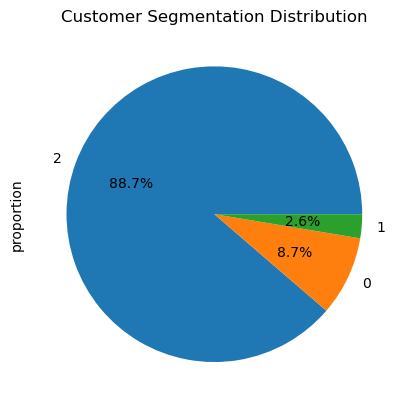

In [235]:
# Plotting for customer_info data set
(customer_info.cluster_id.value_counts(normalize=True) * 100).plot.pie(autopct='%1.1f%%')
plt.title("Customer Segmentation Distribution")


- '1' Cluster -- Prolonged Invoice Payment

- '2' Cluster -- Early Invoice Payment

- '0' Cluster -- Medium Invoice Payment

- From the above we can see that Early customers comprise of 88.7% of customers whereas medium and prolonged payers are 11.3% in total

In [237]:
# Merging payment_data and cust_deg to add clustering index
merged_data = pd.merge(payment_data, customer_segments, how='inner', on='CUSTOMER_NAME')
merged_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV,act_days_for_pay,cluster_id
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.630400,14200000001,2020-11-02,2020-12-30,AED,...,0,0,0,0,0,0,0,1,169,2
1,WIRE,C EA Corp,37403,2021-05-19,AED,2859.090000,1.2721E+11,2021-04-07,2021-05-30,AED,...,0,0,0,0,0,0,0,1,42,2
2,WIRE,C EA Corp,37403,2021-02-20,AED,10.578625,2.412E+11,2020-11-26,2020-12-26,AED,...,0,0,0,0,0,0,0,1,86,2
3,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.211330,99200000043,2020-12-29,2021-01-28,SAR,...,0,0,0,0,0,0,0,1,33,2
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.609710,99210000003,2021-01-30,2021-03-01,SAR,...,0,0,0,0,0,0,0,1,1,2


In [238]:
# checking null values for clusters
merged_data['cluster_id'].isnull().sum()

0

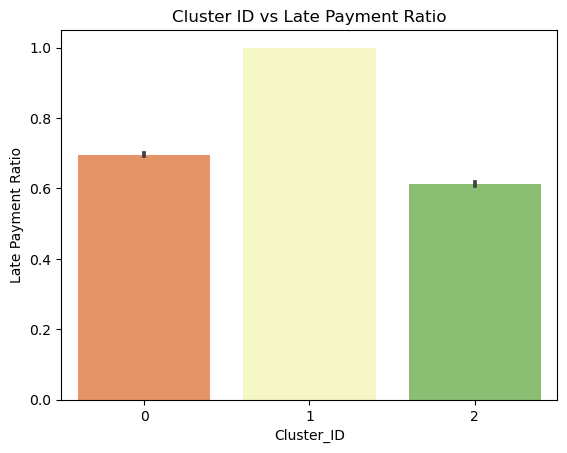

In [239]:
# Visualizing for the merged dataframe
sns.barplot(data=merged_data, x='cluster_id', y='default', estimator=np.mean, palette='RdYlGn')
plt.title("Cluster ID vs Late Payment Ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()


In [240]:
merged_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV',
       'act_days_for_pay', 'cluster_id'],
      dtype='object')

## Step 4: Data Preparation for Model building

In [242]:
# Creating a new dataframe with important variables for model building

regression_data = merged_data[['USD Amount','INVOICE_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                    '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM', 
                    '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                    'DM', 'INV', 'CM','cluster_id']]
regression_data.head()

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,101018.630400,2020-11-02,0,1,0,0,0,0,0,0,0,0,0,1,0,2
1,2859.090000,2021-04-07,0,1,0,0,0,0,0,0,0,0,0,1,0,2
2,10.578625,2020-11-26,0,0,1,0,0,0,0,0,0,0,0,1,0,2
3,48990.211330,2020-12-29,0,0,1,0,0,0,0,0,0,0,0,1,0,2
4,41991.609710,2021-01-30,0,0,1,0,0,0,0,0,0,0,0,1,0,2


In [243]:
regression_data.shape

(92811, 16)

In [244]:
# Creating Invoice_Month column and dropping INVOICE_CREATION_DATE
regression_data['Invoice_Month'] = regression_data['INVOICE_CREATION_DATE'].dt.month
regression_data.drop('INVOICE_CREATION_DATE',axis=1,inplace= True)
regression_data.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,0,2,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,0,2,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,0,2,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,0,2,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,0,2,1


In [245]:
# Open Invoice dataset
open_regression_data = invoice_data[['Due Date','USD Amount', 'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                         '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
                         '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                         'DM', 'INV', 'CM','AGE']]

In [246]:
open_regression_data.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE
1,2022-03-03,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,0,33
2,2022-04-23,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,-18
3,2022-01-19,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,0,76
4,2022-04-30,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,-25
5,2022-04-30,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,-25


In [247]:
# Creating Invoice_Month column and dropping INV_CREATION_DATE
open_regression_data['Invoice_Month'] = open_regression_data['INV_CREATION_DATE'].dt.month
open_regression_data.drop('INV_CREATION_DATE',axis=1,inplace= True)
open_regression_data.head()

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month
1,2022-03-03,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2
2,2022-04-23,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3
3,2022-01-19,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1
4,2022-04-30,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3
5,2022-04-30,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3


In [248]:
# Creating Due_Month column and dropping Due Date
open_regression_data['Due_Month'] = open_regression_data['Due Date'].dt.month
open_regression_data.drop('Due Date',axis=1,inplace= True)
open_regression_data.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month,Due_Month
1,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2,3
2,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3,4
3,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1,1
4,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4
5,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4


In [249]:
# Checking columns for both datasets
regression_data.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [250]:
open_regression_data.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM', 'AGE',
       'Invoice_Month', 'Due_Month'],
      dtype='object')

## Train- Test Split

In [252]:
# Feature variables X
X = regression_data.copy()
X.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,0,2,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,0,2,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,0,2,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,0,2,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,0,2,1


In [253]:
# Target variable y
y = merged_data['default']
y.head()

0    1
1    0
2    1
3    1
4    0
Name: default, dtype: int32

In [254]:
# Splitting into train and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
52625,571661.900,0,0,1,0,0,0,0,0,0,0,0,1,0,2,10
29115,1157180.634,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
80920,148278.340,0,0,0,0,0,0,0,0,1,0,0,1,0,2,10
55019,490129.340,0,0,0,0,0,0,0,0,1,0,0,1,0,2,1
82266,45541.580,0,0,0,0,0,0,1,0,0,0,0,1,0,2,10


### Feature Scaling

In [256]:
X_train.shape

(64967, 16)

In [257]:
# Feature scaling for USD amount
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
52625,0.038683,0,0,1,0,0,0,0,0,0,0,0,1,0,2,10
29115,0.655995,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
80920,-0.407691,0,0,0,0,0,0,0,0,1,0,0,1,0,2,10
55019,-0.047277,0,0,0,0,0,0,0,0,1,0,0,1,0,2,1
82266,-0.516006,0,0,0,0,0,0,1,0,0,0,0,1,0,2,10


In [258]:
X_train.describe()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
count,6.496700e+04,64967.00000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000
mean,1.055419e-17,0.08138,0.122324,0.150815,0.041236,0.038373,0.135761,0.212092,0.041529,0.023874,0.111641,0.005895,0.941047,0.053058,0.942663,5.465867
std,1.000008e+00,0.27342,0.327662,0.357871,0.198838,0.192097,0.342537,0.408793,0.199511,0.152657,0.314927,0.076555,0.235539,0.224150,0.997406,4.076222
min,-5.640180e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-5.219380e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,-3.628973e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
75%,6.815221e-02,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,10.000000
max,1.087496e+01,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,12.000000


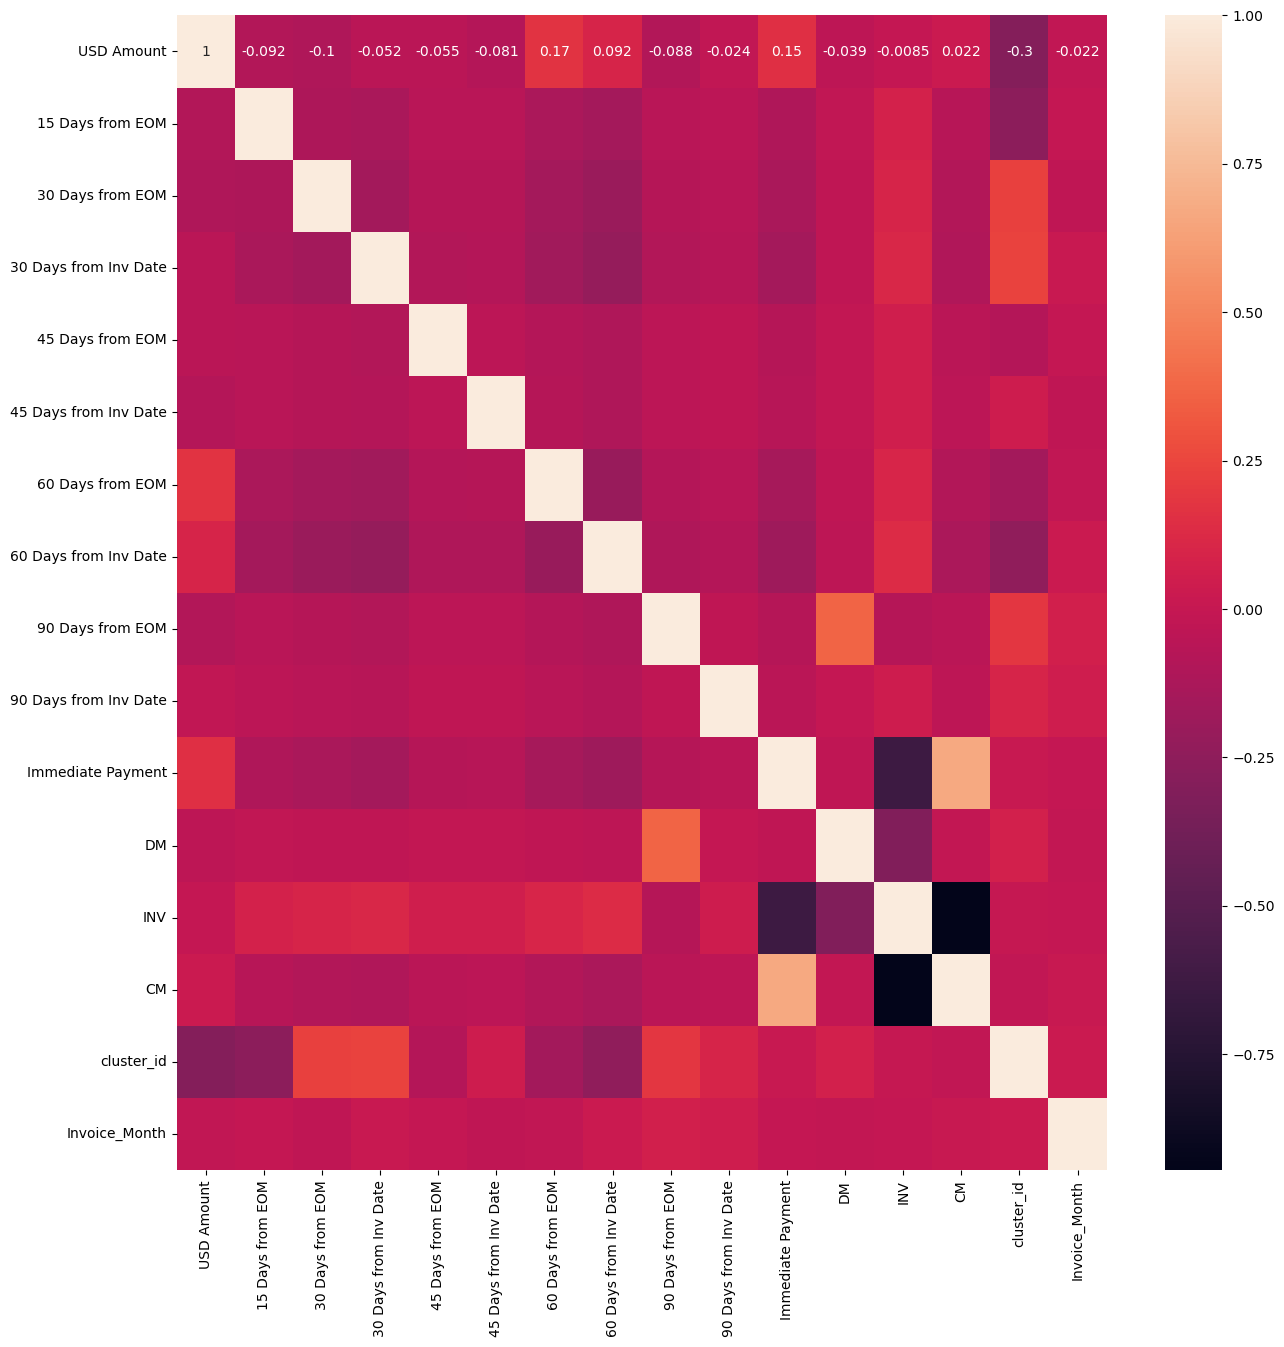

In [259]:
# Plotting heat map of X_train dataset
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

##### - High multicollinearity observed between CM & INV, INV & Immediate Payment, and DM & 90 days from EOM columns. Therefore, these columns are being dropped.

In [261]:
# Dropping the columns from train and test data

X_train.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)
X_test.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)

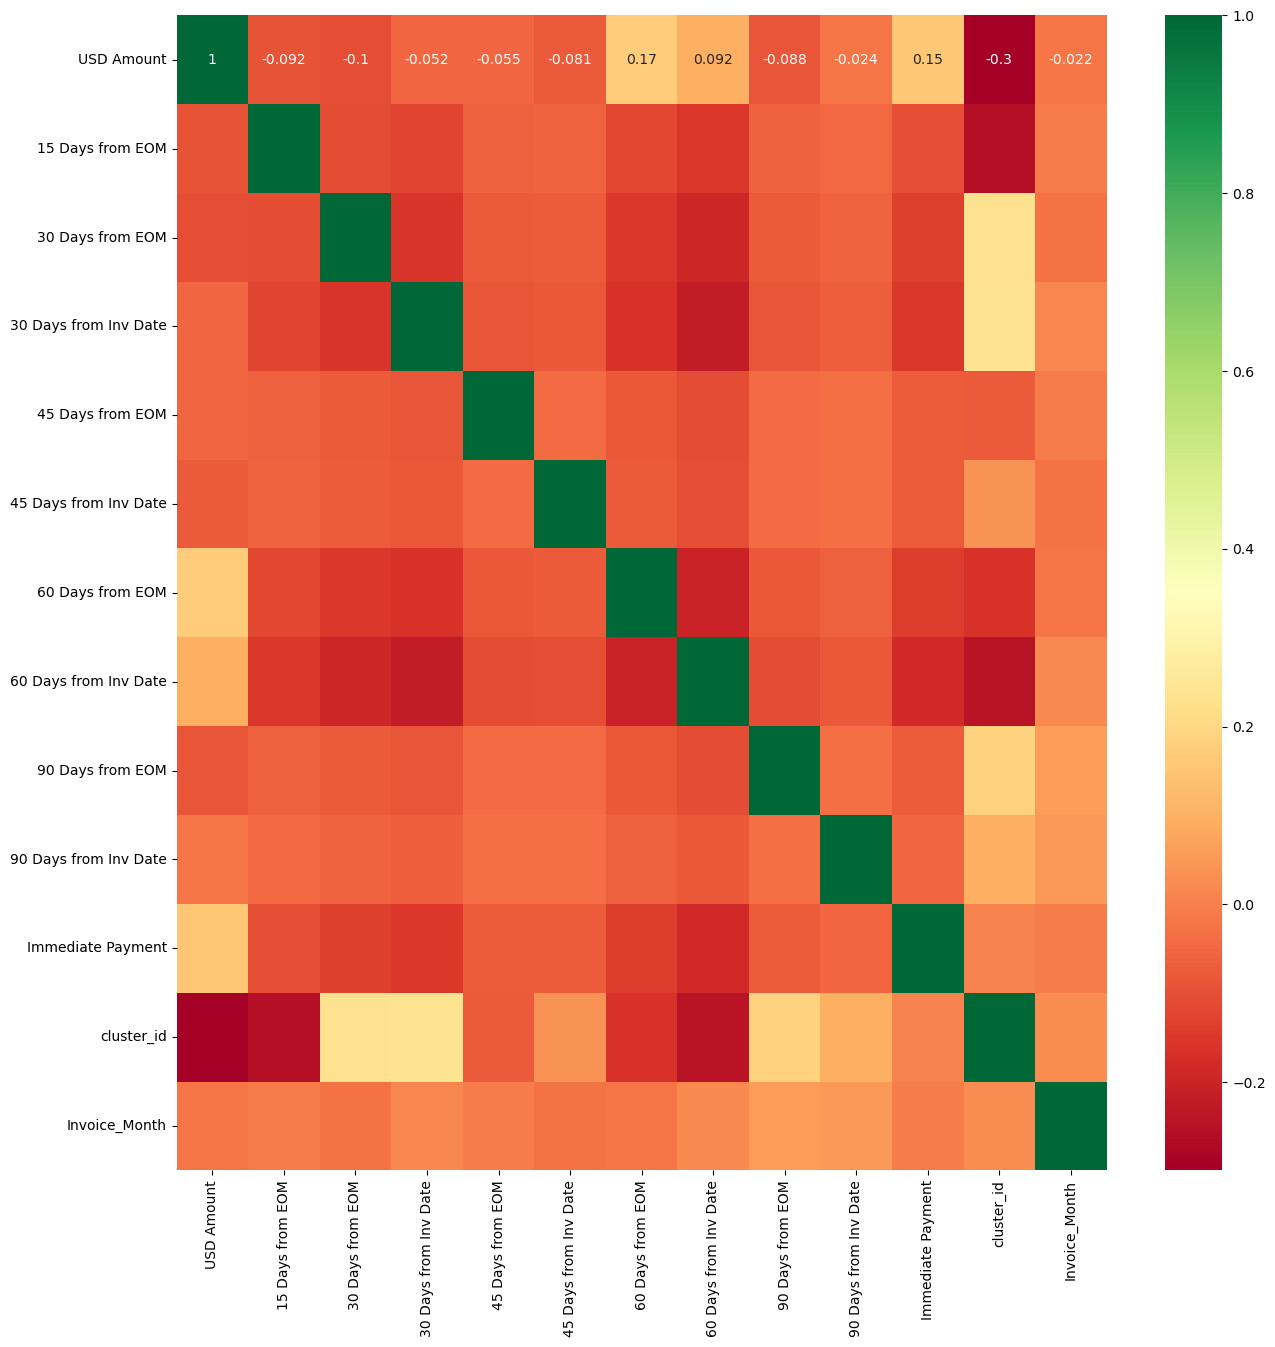

In [262]:
# Plotting heat map of X_train dataset again
plt.figure(figsize=(15, 15))
sns.heatmap(X_train.corr(), annot=True, cmap='RdYlGn')
plt.show()


##### - Now the data has no high multicollinearity. Going ahead with model building

## Model Building

### Logistic Regression

In [266]:
import statsmodels.api as sm

### 1st Model

In [268]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64953
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30211.
Date:                Tue, 10 Dec 2024   Deviance:                       60423.
Time:                        22:28:18   Pearson chi2:                 6.33e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3008
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.7818      0.049     15.840      0.000       0.685       0.878
USD Amount               -0.1132      0.012     -9.402      0.000      -0.137      -0.090
15 Days from EOM          2.6233      0.109     24.105      0.000       2.410       2.837
30 Days from EOM         -2.2427      0.052    -42.908      0.000      -2.345      -2.140
30 Days from Inv Date     0.2532      0.051      4.920      0.000       0.152       0.354
45 Days from EOM          0.3778      0.069      5.468      0.000       0.242       0.513
45 Days from Inv Date    -0.3264      0.063     -5.209      0.000      -0.449      -0.204
60 Days from EOM         -2.2324      0.053    -42.076      0.000      -2.336      -2.128
60 Days from Inv Date    -0.2874      0.050     -5.703      0.000      -0.386      -0.189
90 Days from EOM         -0.4668      0.061     -7.600      0.000      -0.587      -0.346
90 Days from Inv Date    -0.9838      0.069    -14.249      0.000      -1.119      -0.849
Immediate Payment         3.1188      0.105     29.605      0.000       2.912       3.325
cluster_id               -0.1552      0.012    -12.755      0.000      -0.179      -0.131
Invoice_Month             0.0958      0.003     37.832      0.000       0.091       0.101
=========================================================================================
"""

#### Checking VIF

In [270]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Invoice_Month,2.68
11,cluster_id,2.60
3,30 Days from Inv Date,1.66
2,30 Days from EOM,1.52
7,60 Days from Inv Date,1.45
10,Immediate Payment,1.36
6,60 Days from EOM,1.30
8,90 Days from EOM,1.26
0,USD Amount,1.20
1,15 Days from EOM,1.14


##### - Both the p-value and VIF are within acceptable ranges, so we proceed with this model.

In [272]:
# Predicted values for train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

52625    0.842600
29115    0.193231
80920    0.620388
55019    0.398571
82266    0.768503
16093    0.977186
54916    0.695423
15532    0.989683
2618     0.783162
79771    0.796924
dtype: float64

In [273]:
# Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84260047, 0.19323102, 0.62038841, 0.39857148, 0.76850257,
       0.97718586, 0.6954225 , 0.9896831 , 0.78316174, 0.79692434])

In [274]:
# Creating a dataframe for predicted values
y_pred = pd.DataFrame({'default':y_train.values, 'default_pred':y_train_pred})
y_pred.head()

,default,default_pred
0,1,0.842600
1,0,0.193231
2,1,0.620388
3,1,0.398571
4,1,0.768503


#### Creating a new column 'final_pred' if 'default_pred' > 0.5

In [276]:
# Making the prediction based on 0.5 cutoff
y_pred['logreg_pred'] = y_pred['default_pred'].map(lambda x:1 if x>0.5 else 0) 
y_pred.head()

,default,default_pred,logreg_pred
0,1,0.842600,1
1,0,0.193231,0
2,1,0.620388,1
3,1,0.398571,0
4,1,0.768503,1


In [277]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from statsmodels.tools.tools import add_constant

In [278]:
# Confusion Matrix
confusion = confusion_matrix(y_pred.default, y_pred.logreg_pred)
confusion

array([[12799,  9577],
       [ 4526, 38065]], dtype=int64)

In [279]:
# Accuracy
print(accuracy_score(y_pred.default, y_pred.logreg_pred))

0.782920559668755


##### - We have 78.3% accuracy for our train data set.

In [281]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [282]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.893733417858233

In [283]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.5719967822667144

In [284]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.42800321773328565


In [285]:
# positive predictive value 
print (TP / float(TP+FP))

0.7989798916922044


In [286]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7387590187590187


#### Finding the optimal cutoff point

In [288]:
# Trying out multiple threshold values
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred[f'y_pred_{i}'] = y_pred['default_pred'].apply(lambda x : 1 if x > i else 0)
y_pred

,default,default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9
0,1,0.842600,1,1,1,1,1,1,1,1,1,0
1,0,0.193231,0,1,0,0,0,0,0,0,0,0
2,1,0.620388,1,1,1,1,1,1,1,0,0,0
3,1,0.398571,0,1,1,1,0,0,0,0,0,0
4,1,0.768503,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64962,1,0.990115,1,1,1,1,1,1,1,1,1,1
64963,1,0.526386,1,1,1,1,1,1,0,0,0,0
64964,1,0.652419,1,1,1,1,1,1,1,0,0,0
64965,0,0.193817,0,1,0,0,0,0,0,0,0,0


In [289]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred.default, y_pred[f'y_pred_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.655579  1.000000  0.000000
0.2   0.2  0.702156  0.972882  0.186852
0.3   0.3  0.775578  0.949309  0.444896
0.4   0.4  0.775840  0.910544  0.519440
0.5   0.5  0.782921  0.893733  0.571997
0.6   0.6  0.774224  0.856942  0.616777
0.7   0.7  0.720042  0.688479  0.780122
0.8   0.8  0.645728  0.496372  0.930014
0.9   0.9  0.540967  0.306074  0.988068


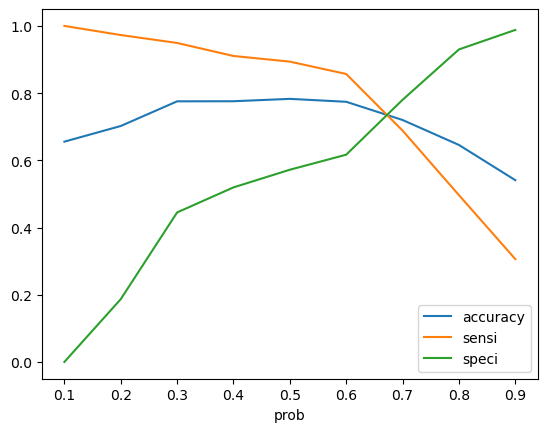

In [290]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### - Based on the curve above, 0.6 is identified as the optimal cutoff probability.

##### 

In [293]:
# Creating a column based on 0.6 cutoff for prediction
y_pred['final_predicted'] = y_pred.default_pred.map( lambda x: 1 if x > 0.6 else 0)

y_pred.head()

,default,default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9,final_predicted
0,1,0.842600,1,1,1,1,1,1,1,1,1,0,1
1,0,0.193231,0,1,0,0,0,0,0,0,0,0,0
2,1,0.620388,1,1,1,1,1,1,1,0,0,0,1
3,1,0.398571,0,1,1,1,0,0,0,0,0,0,0
4,1,0.768503,1,1,1,1,1,1,1,1,0,0,1


In [294]:
# Let's check the overall accuracy.
accuracy_score(y_pred.default, y_pred.final_predicted)

0.7742238367171025

In [295]:
# Precision Score
precision_score(y_pred.default, y_pred.final_predicted)

0.8097530672464669

In [296]:
# Recall Score
recall_score(y_pred.default, y_pred.final_predicted)

0.8569416073818412

In [297]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred.default, y_pred.default_pred)

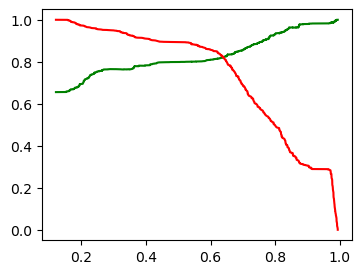

In [298]:
# Plotting for threshold
plt.figure(figsize=(4,3))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


##### - From the Precision & Recall trade-off, the optimal cutoff was found to be between 0.6 and 0.7. Therefore, the cutoff is set at 0.6.

##### 

### Plotting the ROC curve

In [302]:
from sklearn.metrics import roc_auc_score,roc_curve

In [303]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [304]:
fpr, tpr, thresholds = roc_curve(y_pred.default,y_pred.default_pred,drop_intermediate = False)

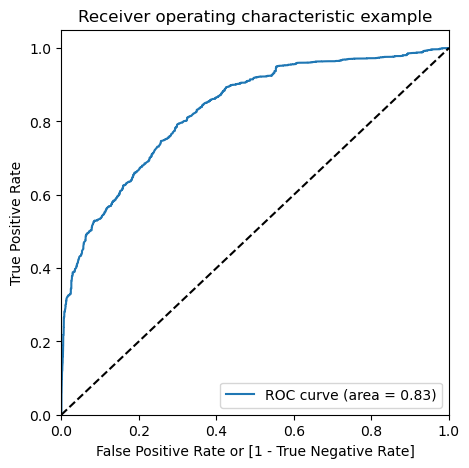

In [305]:
draw_roc(y_pred.default,y_pred.default_pred)

- AUC = 0.83 which shows the model is good.

### Making predictions on the test set

In [308]:
# Transforming the numerical column of test set
X_test[['USD Amount']]= scaler.transform(X_test[['USD Amount']])
X_test.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,cluster_id,Invoice_Month
12743,-0.282967,0,0,0,0,0,0,0,0,0,1,0,12
75338,-0.543059,0,1,0,0,0,0,0,0,0,0,2,1
39614,0.811935,0,0,0,0,0,0,1,0,0,0,0,4
52529,0.038683,0,0,0,0,0,0,0,0,1,0,2,10
47001,-0.383619,0,1,0,0,0,0,0,0,0,0,2,4


In [309]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [310]:
#Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

12743    0.993829
75338    0.166005
39614    0.686859
52529    0.608420
47001    0.206693
90315    0.587936
28144    0.653187
29929    0.204446
80190    0.707432
1736     0.887864
dtype: float64

In [311]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [312]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [313]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [314]:
y_test_df.head()

,default,CustID
12743,1,12743
75338,1,75338
39614,1,39614
52529,1,52529
47001,0,47001


In [315]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [316]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [317]:
y_pred_final.head()

,default,CustID,0
0,1,12743,0.993829
1,1,75338,0.166005
2,1,39614,0.686859
3,1,52529,0.608420
4,0,47001,0.206693


In [318]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Delay_Prob','target':'Delay'})

In [319]:
# Let's see the head of y_pred_final
y_pred_final.head()

,default,CustID,Delay_Prob
0,1,12743,0.993829
1,1,75338,0.166005
2,1,39614,0.686859
3,1,52529,0.608420
4,0,47001,0.206693


In [320]:
# Creating final prediction on test set based on 0.6 cutoff
y_pred_final['final_predicted'] = y_pred_final.Delay_Prob.map(lambda x: 1 if x >= 0.6 else 0)

In [321]:
y_pred_final.head()

,default,CustID,Delay_Prob,final_predicted
0,1,12743,0.993829,1
1,1,75338,0.166005,0
2,1,39614,0.686859,1
3,1,52529,0.608420,1
4,0,47001,0.206693,0


In [322]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.default, y_pred_final.final_predicted)

0.7754632955035196

In [323]:
#precision score
precision_score(y_pred_final.default, y_pred_final.final_predicted)

0.8115658179569116

In [324]:
# Recall Score
recall_score(y_pred.default, y_pred.final_predicted)

0.8569416073818412

##### - The train and test accuracy are nearly identical, both around 77.5%.

##### 

## Random Forest

In [328]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [329]:
regression_data.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [330]:
# creating X and y
X= regression_data
y= merged_data['default']

In [331]:
# Splitting into train and test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

In [332]:
# Building a base random forest model to check the accuracy

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [333]:
# predicted values
y_train_pred_rf = rf.predict(X_train_rf)

In [334]:
# Checking accuracy and classification report
accuracy = accuracy_score(y_train_rf, y_train_pred_rf)
print(classification_report(y_train_rf, y_train_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     22376
           1       0.95      0.99      0.97     42591

    accuracy                           0.96     64967
   macro avg       0.96      0.95      0.95     64967
weighted avg       0.96      0.96      0.96     64967

Accuracy is :  0.957563070481937


In [335]:
# Using cross validation to check if our model is overfitting

rf_cv = RandomForestClassifier(random_state=42)

# Compute cross-validation scores on the training data
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring= 'recall')

In [336]:
# Compute the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the cross-validation scores
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Mean score: 0.9548965957922156
Standard deviation: 0.003277954728122406


In [337]:
# Creating y_pred for test data
y_test_pred_rf = rf.predict(X_test_rf)

In [338]:
# Checking accuracy and classification report of test data
accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      9502
           1       0.93      0.96      0.94     18342

    accuracy                           0.92     27844
   macro avg       0.92      0.91      0.91     27844
weighted avg       0.92      0.92      0.92     27844

Accuracy is :  0.9234305415888522


### Hyperparameter Tuning

In [340]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs= -1, verbose=2)

grid_search.fit(X_train_rf, y_train_rf)

# Best Hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

print(classification_report(y_train_rf, y_pred_cv_rf))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best f1 score: 0.8956667505529816
              precision    recall  f1-score   support

           0       0.90      0.65      0.76     22376
           1       0.84      0.96      0.90     42591

    accuracy                           0.86     64967
   macro avg       0.87      0.81      0.83     64967
weighted avg       0.86      0.86      0.85     64967



In [341]:
# Test set (testing)

y_pred_test_cv = best_rf.predict(X_test_rf)

print(classification_report(y_test_rf,y_pred_test_cv))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75      9502
           1       0.84      0.96      0.90     18342

    accuracy                           0.85     27844
   macro avg       0.87      0.80      0.82     27844
weighted avg       0.86      0.85      0.85     27844



##### - The classification report shows an F1-score of 0.90 for both the train and test sets, indicating that the model performs well. Therefore, this will be finalized for prediction.

##### 

#### Checking feature importance

In [345]:
importance = best_rf.feature_importances_
sorted_idx = importance.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[idx]} ({importance[idx]:.3f})")

Feature ranking:
1. 60 Days from EOM (0.196)
2. USD Amount (0.190)
3. 30 Days from EOM (0.179)
4. Invoice_Month (0.154)
5. cluster_id (0.082)
6. Immediate Payment (0.073)
7. 15 Days from EOM (0.050)
8. 30 Days from Inv Date (0.020)
9. 60 Days from Inv Date (0.017)
10. INV (0.011)
11. 90 Days from Inv Date (0.008)
12. CM (0.007)
13. 45 Days from EOM (0.005)
14. 90 Days from EOM (0.004)
15. 45 Days from Inv Date (0.002)
16. DM (0.001)


## Preparing Open Invoice dataset for prediction

The open invoice dataset includes an 'AGE' column calculated as the difference between the Transaction Date and AS_OF_DATE.  

- A **positive AGE** value indicates that the payment is already overdue, so no prediction is needed.  
- A **negative AGE** value indicates that the due date has not yet passed.  

The model should focus on predicting whether payments will be delayed only for customers with a **negative AGE** value.

In [348]:
# Selecting rows with negative age value for prediction
open_regression_data_age = invoice_data[invoice_data['AGE'] < 0]
open_regression_data_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0


In [349]:
open_regression_data_age = pd.merge(open_regression_data_age, customer_info, how='left', on='Customer_Name')

In [350]:
# Null counts
round(open_regression_data_age.isna().sum()/len(open_regression_data_age.index), 4)

Customer_Name            0.0000
Due Date                 0.0000
AGE                      0.0000
USD Amount               0.0000
INV_CREATION_DATE        0.0000
15 Days from EOM         0.0000
30 Days from EOM         0.0000
30 Days from Inv Date    0.0000
45 Days from EOM         0.0000
45 Days from Inv Date    0.0000
60 Days from EOM         0.0000
60 Days from Inv Date    0.0000
90 Days from EOM         0.0000
90 Days from Inv Date    0.0000
Immediate Payment        0.0000
DM                       0.0000
INV                      0.0000
CM                       0.0000
cluster_id               0.0274
dtype: float64

- The `cluster_id` column has 2.7% null values, which represent new customers not present in the 'Received Payment' data. To improve model prediction, these null values are being removed.

In [352]:
# Dropping the rows containing null values
open_regression_data_age.dropna(axis=0, inplace=True)

In [353]:
open_regression_data_age.shape

(27247, 19)

In [354]:
open_regression_data_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2.0
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2.0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2.0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2.0


In [355]:
open_regression_data_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 0 to 28014
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_Name          27247 non-null  object        
 1   Due Date               27247 non-null  datetime64[ns]
 2   AGE                    27247 non-null  int64         
 3   USD Amount             27247 non-null  int32         
 4   INV_CREATION_DATE      27247 non-null  datetime64[ns]
 5   15 Days from EOM       27247 non-null  int32         
 6   30 Days from EOM       27247 non-null  int32         
 7   30 Days from Inv Date  27247 non-null  int32         
 8   45 Days from EOM       27247 non-null  int32         
 9   45 Days from Inv Date  27247 non-null  int32         
 10  60 Days from EOM       27247 non-null  int32         
 11  60 Days from Inv Date  27247 non-null  int32         
 12  90 Days from EOM       27247 non-null  int32         
 13  90 Day

In [356]:
# converting the cluster_id column to int
open_regression_data_age['cluster_id'] = open_regression_data_age['cluster_id'].astype('Int64')

In [357]:
# Checking the head after adding 'cluster_id' column
open_regression_data_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,2
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2


In [358]:
# Creating a copy of open_regression_data_age for final prediction
open_regression_data_final = open_regression_data_age.copy()

In [359]:
# Dropping Customer_Name and AGE column
open_regression_data_final.drop(['Customer_Name', 'AGE'], axis=1, inplace=True)

In [360]:
# Extracting Month
open_regression_data_final['Invoice_Month'] = open_regression_data_final['INV_CREATION_DATE'].dt.month 

In [361]:
# dropping due_date and invoice creation date

open_regression_data_final.drop(['Due Date','INV_CREATION_DATE'], axis= 1, inplace= True)

In [362]:
# Checking the columns in the dataset
open_regression_data_final.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

## Final Prediction based on Random Forest model

In [364]:
# getting predictions on open invoices

y_open_invoices= best_rf.predict_proba(open_regression_data_final)[:,1]

y_open_invoices

array([0.6842747 , 0.22552797, 0.27480524, ..., 0.68686641, 0.68728037,
       0.67803216])

In [365]:
# Adding the predicted values to the dataframe
open_regression_data_age['Pred_rf'] = y_open_invoices
open_regression_data_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,2,0.684275
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0.225528
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0.274805
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0.178693
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0.319314


In [366]:
# Customer-wise model prediction
customer_seg_prob= pd.DataFrame(open_regression_data_age.groupby('Customer_Name').prod(numeric_only=True)['Pred_rf'].round(4))
customer_seg_prob

,Pred_rf
Customer_Name,
3D D Corp,0.0000
6TH Corp,0.2105
ABDU Corp,0.0000
ABEE Corp,0.0924
ABU Corp,0.0641
...,...
XPRE Corp,0.0000
YOUG Corp,0.6556
YOUS Corp,0.0005


In [367]:
# Taking 0.6 as cut off value
open_regression_data_age['Final_Prediction'] = open_regression_data_age.Pred_rf.map(lambda x: 1 if x>0.6 else 0)

In [368]:
# Let us check our final dataframe with predictions
open_regression_data_age.head()


,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,...,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf,Final_Prediction
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,...,0,0,0,0,0,1,0,2,0.684275,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,...,0,0,0,0,0,1,0,2,0.225528,0
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,...,0,0,0,0,0,1,0,2,0.274805,0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,...,0,0,0,0,0,1,0,2,0.178693,0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,...,0,0,0,0,0,1,0,2,0.319314,0


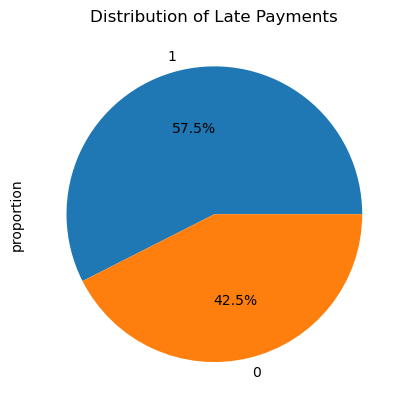

In [369]:
(open_regression_data_age.Final_Prediction.value_counts(normalize=True) * 100).plot.pie(autopct='%1.1f%%')
plt.title("Distribution of Late Payments")
plt.show()


From the pie chart, we can observe that 57.5% of payments in the open invoice data have a negative AGE value, indicating that the due date has not yet been crossed.

### Summary of prediction on Customers_name

In [372]:
# Checking Customers with our target variable_delayed
Delay_payment = open_regression_data_age.groupby(['Customer_Name'])['Final_Prediction'].sum()
Delay_payment = Delay_payment.to_frame()
Delay_payment = Delay_payment.sort_values(by ='Final_Prediction',ascending=False)

In [373]:
# Checking Customers for total invoice counts
Delay_payment_total = open_regression_data_age.groupby(['Customer_Name'])['Final_Prediction'].count() # total payments by each customers
Delay_payment_total = Delay_payment_total.to_frame()
Delay_payment_total = Delay_payment_total.sort_values(by ='Final_Prediction',ascending=False)

In [374]:
# Merging both dataframes based on Customer_name
Merge_df=pd.merge(Delay_payment,Delay_payment_total,how='inner',on='Customer_Name')

In [375]:
# Renaming the columns
Merge_df.columns=["Delayed_Payment","Total_Payments"]

In [376]:
# Creating a column for delay percentage of each customers
Merge_df['Delay%']=np.round(Merge_df['Delayed_Payment']/Merge_df['Total_Payments']*100,2)

In [377]:
# Checking Merge_df 
Merge_df.sort_values('Total_Payments',ascending=False)

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
SEPH Corp,5153,8260,62.38
FITR Corp,2013,3454,58.28
PARF Corp,1063,1717,61.91
AREE Corp,861,1117,77.08
ALLI Corp,141,1042,13.53
...,...,...,...
MEDS Corp,1,1,100.00
ELLA Corp,1,1,100.00
MOJA Corp,1,1,100.00


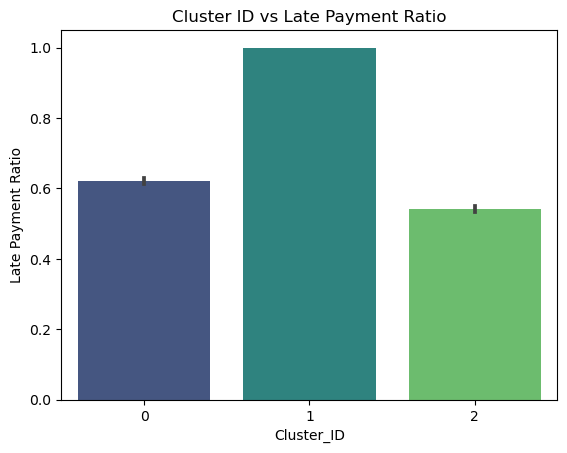

In [378]:
#cluster ID 1 has significantly higher ratio of default than clusters 0 and 2
sns.barplot(data=open_regression_data_age, x='cluster_id', y='Final_Prediction', estimator=np.mean, palette='viridis')
plt.title("Cluster ID vs Late Payment Ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()


In [379]:
# top 10 customers with highest delay rates
Merge_df.sort_values(['Delay%','Total_Payments','Delayed_Payment'],ascending=[False,False,False]).head(10) 

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
PARI Corp,67,67,100.0
SHAM Corp,33,33,100.0
MOHD Corp,29,29,100.0
ELIZ Corp,28,28,100.0
KEND Corp,27,27,100.0
SANA Corp,24,24,100.0
ESTE Corp,21,21,100.0
FRAG Corp,21,21,100.0
VILL Corp,21,21,100.0


## Recommendations based on the derived insights:

### Inferences from Clustering Analysis:

1. **Credit Note Payments**:  
   - These observe the highest delay rate compared to Debit Note or Invoice type classes.  
   - Recommendation: Implement stricter company policies for payment collection related to credit note invoices.

2. **Goods vs Non-Goods**:  
   - Goods-type invoices have significantly higher payment delay rates than non-goods.  
   - Recommendation: Stricter payment policies should be applied to goods-type invoices.

3. **Focus on Lower-Value Payments**:  
   - Lower-value payments constitute the majority of transactions and show higher rates of late payments.  
   - Recommendation: Introduce penalties based on billing amounts, with a higher penalty percentage for smaller bills, as a last resort.

4. **Customer Segments**:  
   - Customers were clustered into three categories:  
     - **Cluster 0**: Medium payment duration.  
     - **Cluster 1**: Prolonged payment duration.  
     - **Cluster 2**: Early payment duration.  
   - Customers in **Cluster 1** exhibit significantly higher delay rates.  
   - Recommendation: Focus extensively on Cluster 1 customers to address delays.

5. **High-Probability Companies**:  
   - Companies with the highest probability of delay and total delayed payment counts should be prioritized.  
   - Recommendation: Pay close attention to these companies to mitigate risks and improve collection efforts.